<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Simple_CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [47]:
x_train.ndim

3

In [48]:
#Test Image
singlepic = x_train[25]
singlepic.shape
singlepic.max()
singlepic.min()

0

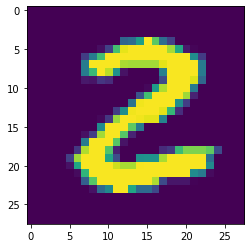

In [49]:
import matplotlib.pyplot as plt
plt.imshow(singlepic)

In [50]:
print(y_train)

[5 0 4 ... 5 6 8]


In [51]:
#converting the y variable into binary by creating the dummy columns
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_train_cat.shape
print(y_train_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [52]:
y_test_cat = to_categorical(y_test)
print(y_test.shape)
print(y_test)

(10000,)
[7 2 1 ... 4 5 6]


In [53]:
#scale the data. Divide the every value with maximum value
# we cannot apply Min Max scaler as shape of image is (60000, 28, 28). We'll get an error.
#Hence Divide the every value with maximum value
x_train = x_train/255
x_train[0]
x_test = x_test/255
x_test[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [54]:
x_train.shape

(60000, 28, 28)

(60000, 28, 28)

60000 - No of images in training data set

28,28 - Pixel size

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten

Steps for CNN
1. Convolutional layer
2. Feature Detector
3. Feature Map
4. Max Pooling Layer
5. Flatten Method
6. Connection With ANN

In [56]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [57]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size =(14,14), input_shape=(28,28,1))) #(Steps 1,2, 3 completed )
# Filter is random number
#Kernel size is feature detector(image size 28,28. We are giving 50%. Hence 14,14)
#input shape should be 3 Dimension. Hence we are adding one more dimension to train and test in the above step.

model.add(MaxPool2D(pool_size=(2,2))) #Step 4. Maxpooling layer. We can take 7,7 or 4,4. But run time will be more
model.add(Flatten()) #Step 6: Flatten 




In [58]:
# Done with CNN Steps and apply this ANN
model.add(Dense(128, activation ='relu')) # Input layer 32*2*2 = 128 Neurons
model.add(Dense(10, activation ='softmax')) # Output Layer 10 Classes (0 to 9). Hence 10


In [59]:
#compiler
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics =["accuracy"])

In [ ]:
#Fitting the Model
model.fit(x = x_train, y = y_train_cat, validation_data=(x_test,y_test_cat), batch_size=1000, epochs=5)

Epoch 1/5
60/60 [==============================] - 31s 494ms/step - loss: 0.5797 - accuracy: 0.8456 - val_loss: 0.2618 - val_accuracy: 0.9244
Epoch 2/5
60/60 [==============================] - 29s 490ms/step - loss: 0.2240 - accuracy: 0.9350 - val_loss: 0.1674 - val_accuracy: 0.9527
Epoch 3/5
 2/60 [>.............................] - ETA: 26s - loss: 0.1597 - accuracy: 0.9535